### Imports

In [1]:
import functools as ft
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from bagpy import bagreader

### Constants

In [2]:
bag_dir = '../data/pb_rosbag/Panele/kwadrat/2023-01-09-19-23-11'

### Load data from csv

In [3]:
bag_file_path = bag_dir + '.bag'
b = bagreader(bag_file_path)

[INFO]  Data folder ../data/pb_rosbag/Panele/kwadrat/2023-01-09-19-23-11 already exists. Not creating.


In [4]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/Servo_data,kin_odom_msg/Measurements,1475,20.789044
1,/cmd_vel,geometry_msgs/Twist,3983,59.960172
2,/filter/quaternion,geometry_msgs/QuaternionStamped,7196,316.694654
3,/imu/acceleration,geometry_msgs/Vector3Stamped,7196,310.988656
4,/imu/angular_velocity,geometry_msgs/Vector3Stamped,7196,310.114898
5,/imu/data,sensor_msgs/Imu,7197,313.522500
6,/imu/mag,geometry_msgs/Vector3Stamped,7196,309.405724
7,/imu/time_ref,sensor_msgs/TimeReference,7196,310.666173
8,/odom,nav_msgs/Odometry,3691,54.669569
9,/rosout,rosgraph_msgs/Log,25,5698.782609


In [5]:
topic_data = {file[:-4]: pd.read_csv(os.path.join(bag_dir, file)) for file in os.listdir(bag_dir)}

### Topics visualization

In [6]:
cmd_vel = topic_data['cmd_vel']
cmd_vel

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.673289e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.000000
1,1.673289e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.000000
2,1.673289e+09,0.000000e+00,0.0,0.0,0.0,0.0,-0.000323
3,1.673289e+09,0.000000e+00,0.0,0.0,0.0,0.0,-0.001240
4,1.673289e+09,0.000000e+00,0.0,0.0,0.0,0.0,-0.002339
...,...,...,...,...,...,...,...
3978,1.673289e+09,6.892413e-05,0.0,0.0,0.0,0.0,0.017903
3979,1.673289e+09,6.888506e-05,0.0,0.0,0.0,0.0,0.017647
3980,1.673289e+09,3.640291e-05,0.0,0.0,0.0,0.0,0.017369
3981,1.673289e+09,3.306048e-07,0.0,0.0,0.0,0.0,0.017039


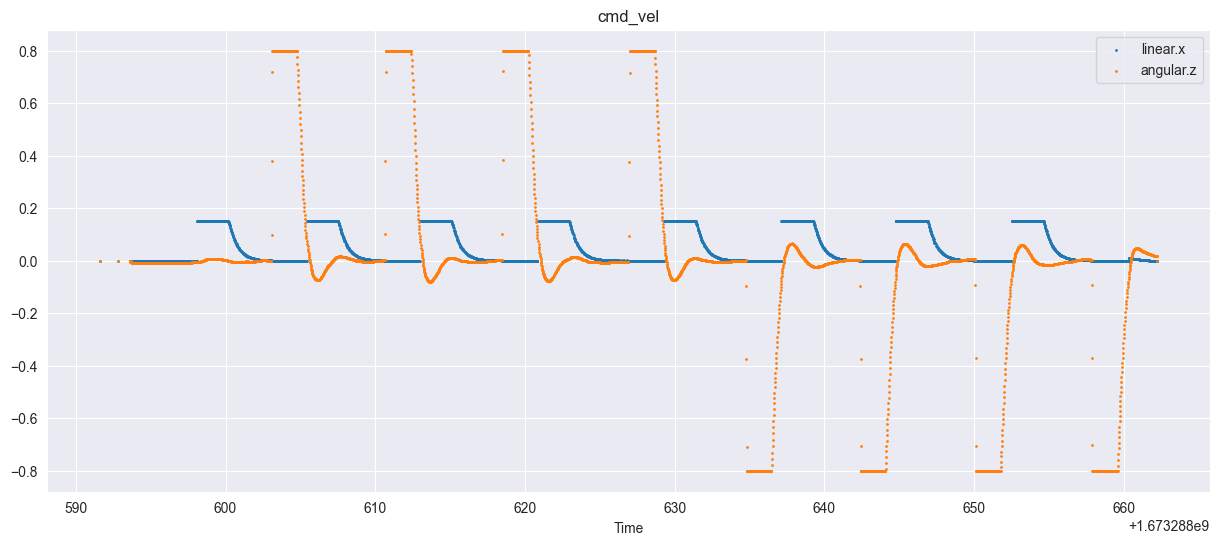

In [7]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['linear.x', 'angular.z']
for col in cols:
    plt.scatter(x=cmd_vel['Time'], y=cmd_vel[col], s=1, label=col)
plt.title('cmd_vel')
plt.xlabel('Time')
plt.legend()
plt.show()

In [8]:
filter_quaternion = topic_data['filter-quaternion']
filter_quaternion

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,quaternion.x,quaternion.y,quaternion.z,quaternion.w
0,1.673289e+09,367053,1673288584,214623036,imu_link,0.007341,-0.003053,-0.878221,0.478189
1,1.673289e+09,367054,1673288584,214638867,imu_link,0.007342,-0.003060,-0.878258,0.478121
2,1.673289e+09,367055,1673288584,214647356,imu_link,0.007329,-0.003060,-0.878295,0.478053
3,1.673289e+09,367056,1673288584,214655255,imu_link,0.007318,-0.003057,-0.878320,0.478007
4,1.673289e+09,367057,1673288584,214662944,imu_link,0.007326,-0.003057,-0.878355,0.477943
...,...,...,...,...,...,...,...,...,...
7191,1.673289e+09,374244,1673288657,871953806,imu_link,0.006710,-0.002546,-0.994177,-0.107524
7192,1.673289e+09,374245,1673288657,871969429,imu_link,0.006729,-0.002542,-0.994170,-0.107588
7193,1.673289e+09,374246,1673288657,871977565,imu_link,0.006736,-0.002551,-0.994163,-0.107644
7194,1.673289e+09,374247,1673288657,871985381,imu_link,0.006742,-0.002561,-0.994156,-0.107714


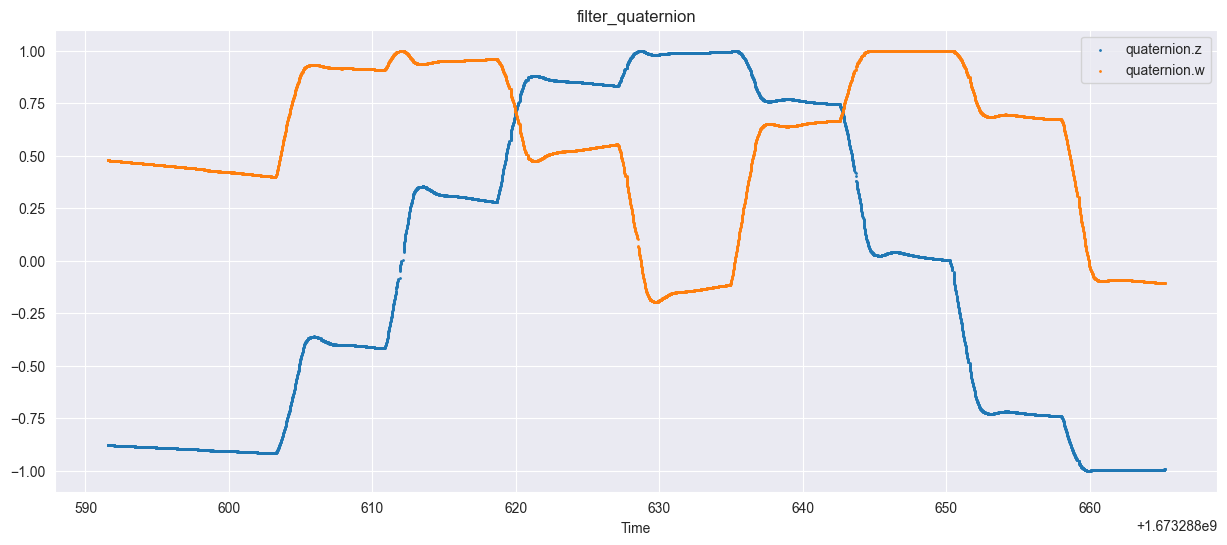

In [9]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['quaternion.z', 'quaternion.w']
for col in cols:
    plt.scatter(x=filter_quaternion['Time'], y=filter_quaternion[col], s=1, label=col)
plt.title('filter_quaternion')
plt.xlabel('Time')
plt.legend()
plt.show()

In [10]:
imu_acceleration = topic_data['imu-acceleration']
imu_acceleration

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673289e+09,367055,1673288584,214623036,imu_link,-0.110799,0.132514,9.990546
1,1.673289e+09,367056,1673288584,214638867,imu_link,-0.100181,0.140578,9.978601
2,1.673289e+09,367057,1673288584,214647356,imu_link,-0.122520,0.124104,9.996028
3,1.673289e+09,367058,1673288584,214655255,imu_link,-0.102620,0.139339,10.005949
4,1.673289e+09,367059,1673288584,214662944,imu_link,-0.111927,0.147904,10.000138
...,...,...,...,...,...,...,...,...
7191,1.673289e+09,374246,1673288657,871953806,imu_link,-0.105442,0.154576,10.008753
7192,1.673289e+09,374247,1673288657,871969429,imu_link,-0.098463,0.145192,9.974219
7193,1.673289e+09,374248,1673288657,871977565,imu_link,-0.104665,0.137727,10.017829
7194,1.673289e+09,374249,1673288657,871985381,imu_link,-0.107715,0.150930,9.993776


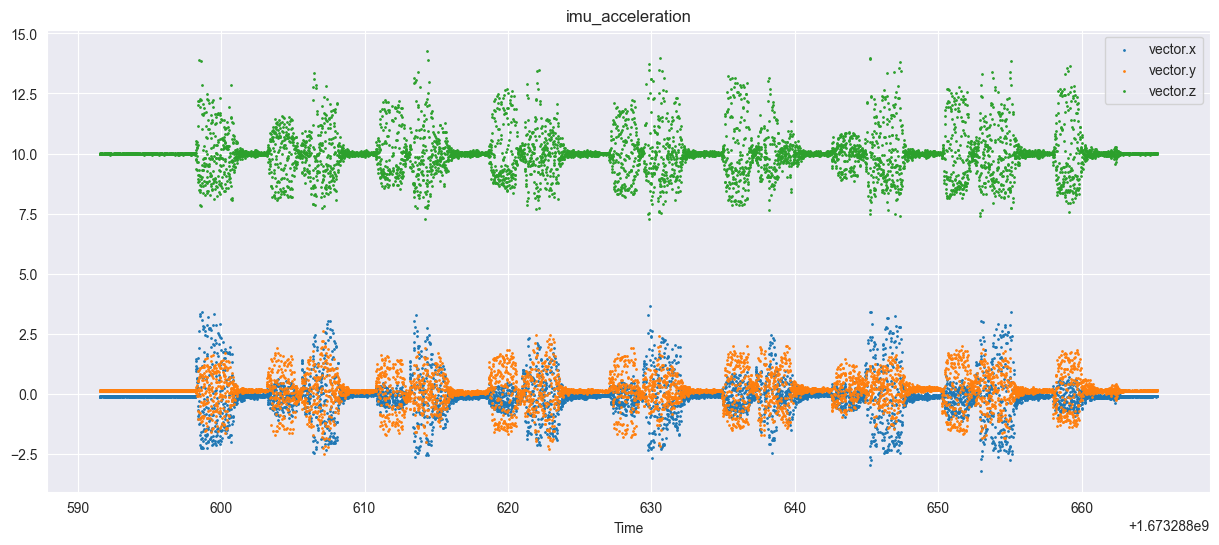

In [11]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_acceleration['Time'], y=imu_acceleration[col], s=1, label=col)
plt.title('imu_acceleration')
plt.xlabel('Time')
plt.legend()
plt.show()

In [12]:
imu_angular_velocity = topic_data['imu-angular_velocity']
imu_angular_velocity

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673289e+09,367055,1673288584,214623036,imu_link,0.011776,-0.000517,-0.011863
1,1.673289e+09,367056,1673288584,214638867,imu_link,0.011440,-0.001236,-0.014137
2,1.673289e+09,367057,1673288584,214647356,imu_link,0.010583,-0.001840,-0.011366
3,1.673289e+09,367058,1673288584,214655255,imu_link,0.010670,-0.001368,-0.011581
4,1.673289e+09,367059,1673288584,214662944,imu_link,0.012317,0.000597,-0.012842
...,...,...,...,...,...,...,...,...
7191,1.673289e+09,374246,1673288657,871953806,imu_link,0.010707,0.000884,-0.013038
7192,1.673289e+09,374247,1673288657,871969429,imu_link,0.010825,0.000087,-0.012238
7193,1.673289e+09,374248,1673288657,871977565,imu_link,0.012370,0.002024,-0.012567
7194,1.673289e+09,374249,1673288657,871985381,imu_link,0.011115,-0.000950,-0.013975


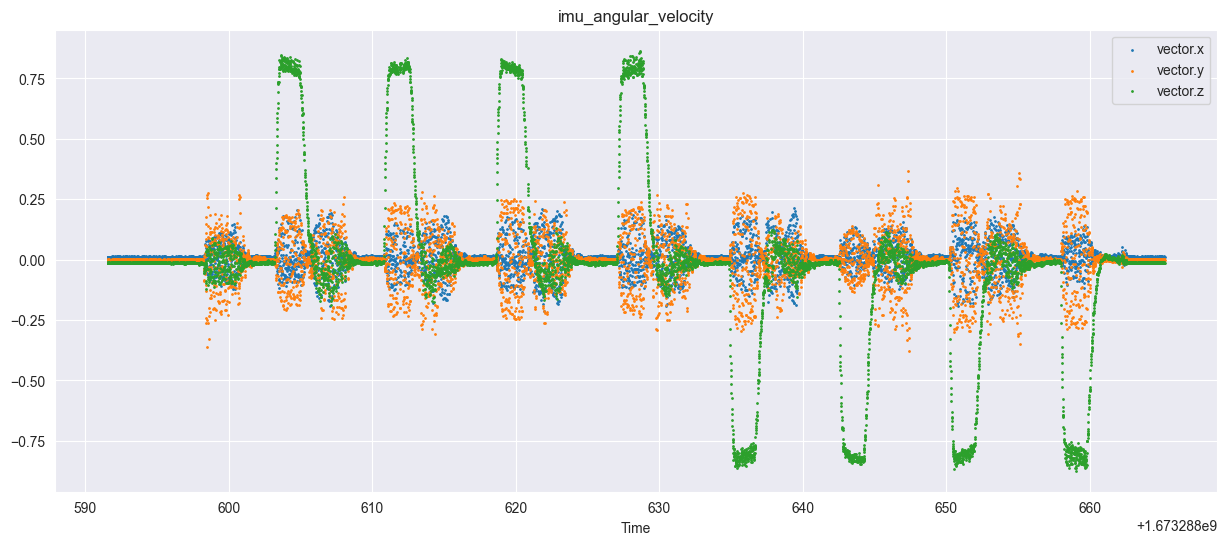

In [13]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_angular_velocity['Time'], y=imu_angular_velocity[col], s=1, label=col)
plt.title('imu_angular_velocity')
plt.xlabel('Time')
plt.legend()
plt.show()

In [14]:
imu_mag = topic_data['imu-mag']
imu_mag

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673289e+09,367055,1673288584,214623036,imu_link,1.412048,0.453528,-0.521054
1,1.673289e+09,367056,1673288584,214638867,imu_link,1.433321,0.439077,-0.536557
2,1.673289e+09,367057,1673288584,214647356,imu_link,1.425031,0.417315,-0.536354
3,1.673289e+09,367058,1673288584,214655255,imu_link,1.413349,0.436990,-0.507563
4,1.673289e+09,367059,1673288584,214662944,imu_link,1.414402,0.455746,-0.531666
...,...,...,...,...,...,...,...,...
7191,1.673289e+09,374246,1673288657,871953806,imu_link,1.583620,0.566844,-0.510201
7192,1.673289e+09,374247,1673288657,871969429,imu_link,1.572204,0.552472,-0.499520
7193,1.673289e+09,374248,1673288657,871977565,imu_link,1.553235,0.569416,-0.481374
7194,1.673289e+09,374249,1673288657,871985381,imu_link,1.564112,0.590774,-0.502760


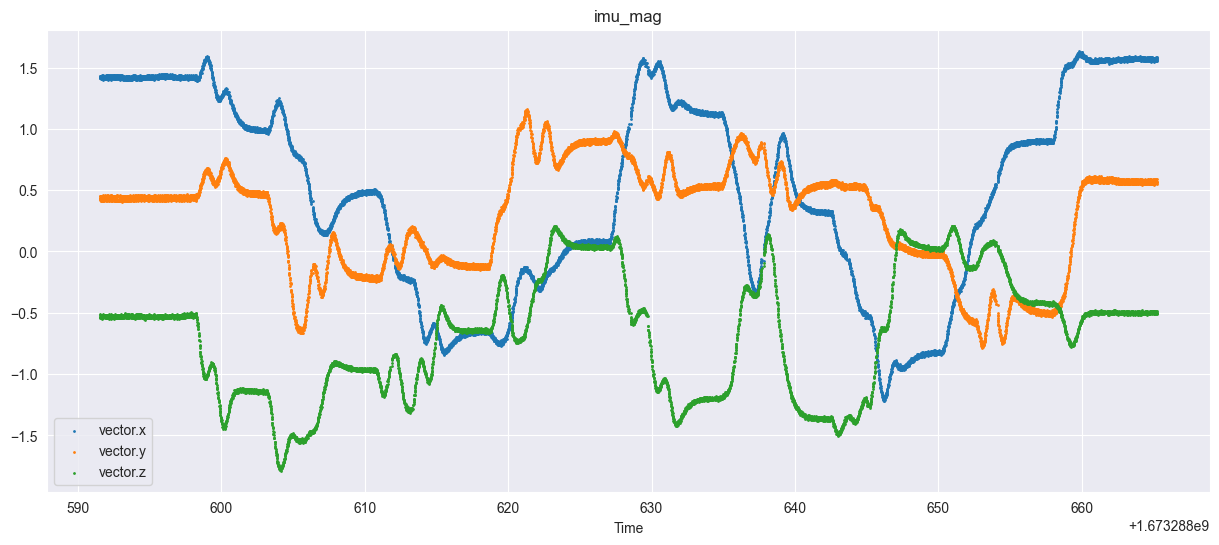

In [15]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_mag['Time'], y=imu_mag[col], s=1, label=col)
plt.title('imu_mag')
plt.xlabel('Time')
plt.legend()
plt.show()

In [16]:
odom = topic_data['odom']
odom

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.673289e+09,186644,1673288584,64025128,odom,base_link,0.000395,0.002402,0.0,0.0,...,-0.000198,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.673289e+09,186645,1673288584,84128781,odom,base_link,0.000395,0.002402,0.0,0.0,...,-0.000198,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.673289e+09,186646,1673288584,104052645,odom,base_link,0.000395,0.002402,0.0,0.0,...,-0.000198,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.673289e+09,186647,1673288584,124031869,odom,base_link,0.000395,0.002402,0.0,0.0,...,-0.000198,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.673289e+09,186648,1673288584,144018393,odom,base_link,0.000395,0.002402,0.0,0.0,...,-0.000198,1.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,1.673289e+09,190330,1673288657,784065238,odom,base_link,-0.044209,0.002178,0.0,0.0,...,-0.048864,0.998805,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3687,1.673289e+09,190331,1673288657,804055217,odom,base_link,-0.044209,0.002178,0.0,0.0,...,-0.048864,0.998805,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3688,1.673289e+09,190332,1673288657,824030974,odom,base_link,-0.044209,0.002178,0.0,0.0,...,-0.048864,0.998805,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3689,1.673289e+09,190333,1673288657,844022168,odom,base_link,-0.044209,0.002178,0.0,0.0,...,-0.048864,0.998805,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


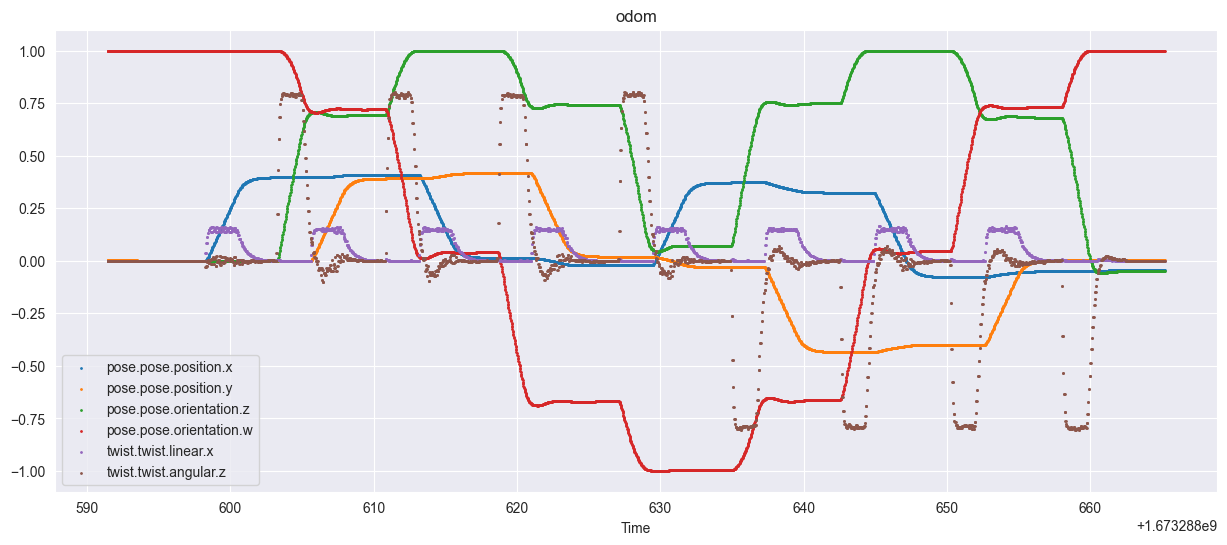

In [17]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['pose.pose.position.x', 'pose.pose.position.y', 'pose.pose.orientation.z', 'pose.pose.orientation.w', 'twist.twist.linear.x', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=odom['Time'], y=odom[col], s=1, label=col)
plt.title('odom')
plt.xlabel('Time')
plt.legend()
plt.show()

### Refine data

In [18]:
time = cmd_vel['Time'] - cmd_vel['Time'].min()
imu_data = topic_data['imu-data']

In [19]:
time

0        0.000000
1        1.198179
2        1.975816
3        1.994503
4        2.007414
          ...    
3978    70.515068
3979    70.530778
3980    70.556785
3981    70.575143
3982    70.581551
Name: Time, Length: 3983, dtype: float64

In [20]:
cmd_vel_refined = cmd_vel.drop(columns=['linear.y', 'linear.z', 'angular.x', 'angular.y'])
filter_quaternion_refined = imu_data[['Time', 'orientation.z', 'orientation.w']]
imu_acceleration_refined = imu_data[['Time', 'linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z']]
imu_angular_velocity_refined = imu_data[['Time', 'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z']]
imu_mag_refined = imu_mag.drop(columns=['header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id'])
odom_refined = odom.drop(columns=['header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id', 'child_frame_id', 'pose.covariance', 'twist.covariance',
                                  'pose.pose.position.z', 'pose.pose.orientation.x', 'pose.pose.orientation.y',
                                  'twist.twist.linear.y', 'twist.twist.linear.z', 'twist.twist.angular.x', 'twist.twist.angular.y'])

In [21]:
dataframes = [cmd_vel_refined, filter_quaternion_refined, imu_acceleration_refined, imu_angular_velocity_refined, imu_mag_refined, odom_refined]
dataframe = ft.reduce(lambda left, right: pd.merge(left, right, how='outer', on='Time'), dataframes)
dataframe.ffill(inplace=True)
dataframe.bfill(inplace=True)
dataframe['Time'] -= dataframe['Time'].min()
# dataframe.set_index('Time', inplace=True)
dataframe

,Time,linear.x,angular.z,orientation.z,orientation.w,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,angular_velocity.x,angular_velocity.y,angular_velocity.z,vector.x,vector.y,vector.z,pose.pose.position.x,pose.pose.position.y,pose.pose.orientation.z,pose.pose.orientation.w,twist.twist.linear.x,twist.twist.angular.z
0,0.000000,0.0,0.0,-0.878191,0.478245,-0.119658,0.128136,9.982091,0.010332,-0.000913,-0.012167,1.412048,0.453528,-0.521054,0.000395,0.002402,-0.000198,1.000000,0.0,0.0
1,0.000800,0.0,0.0,-0.878191,0.478245,-0.119658,0.128136,9.982091,0.010332,-0.000913,-0.012167,1.412048,0.453528,-0.521054,0.000395,0.002402,-0.000198,1.000000,0.0,0.0
2,0.001363,0.0,0.0,-0.878191,0.478245,-0.119658,0.128136,9.982091,0.010332,-0.000913,-0.012167,1.412048,0.453528,-0.521054,0.000395,0.002402,-0.000198,1.000000,0.0,0.0
3,0.014993,0.0,0.0,-0.878191,0.478245,-0.119658,0.128136,9.982091,0.010332,-0.000913,-0.012167,1.412048,0.453528,-0.521054,0.000395,0.002402,-0.000198,1.000000,0.0,0.0
4,0.034852,0.0,0.0,-0.878191,0.478245,-0.119658,0.128136,9.982091,0.010332,-0.000913,-0.012167,1.412048,0.453528,-0.521054,0.000395,0.002402,-0.000198,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22058,73.773310,0.0,0.0,-0.994163,-0.107644,-0.104665,0.137727,10.017829,0.012370,0.002024,-0.012567,1.553235,0.569416,-0.481374,-0.044209,0.002178,-0.048864,0.998805,0.0,0.0
22059,73.776837,0.0,0.0,-0.994156,-0.107714,-0.107715,0.150930,9.993776,0.011115,-0.000950,-0.013975,1.553235,0.569416,-0.481374,-0.044209,0.002178,-0.048864,0.998805,0.0,0.0
22060,73.777734,0.0,0.0,-0.994156,-0.107714,-0.107715,0.150930,9.993776,0.011115,-0.000950,-0.013975,1.564112,0.590774,-0.502760,-0.044209,0.002178,-0.048864,0.998805,0.0,0.0
22061,73.781948,0.0,0.0,-0.994148,-0.107787,-0.103743,0.141920,10.006894,0.012665,-0.001441,-0.013975,1.564112,0.590774,-0.502760,-0.044209,0.002178,-0.048864,0.998805,0.0,0.0


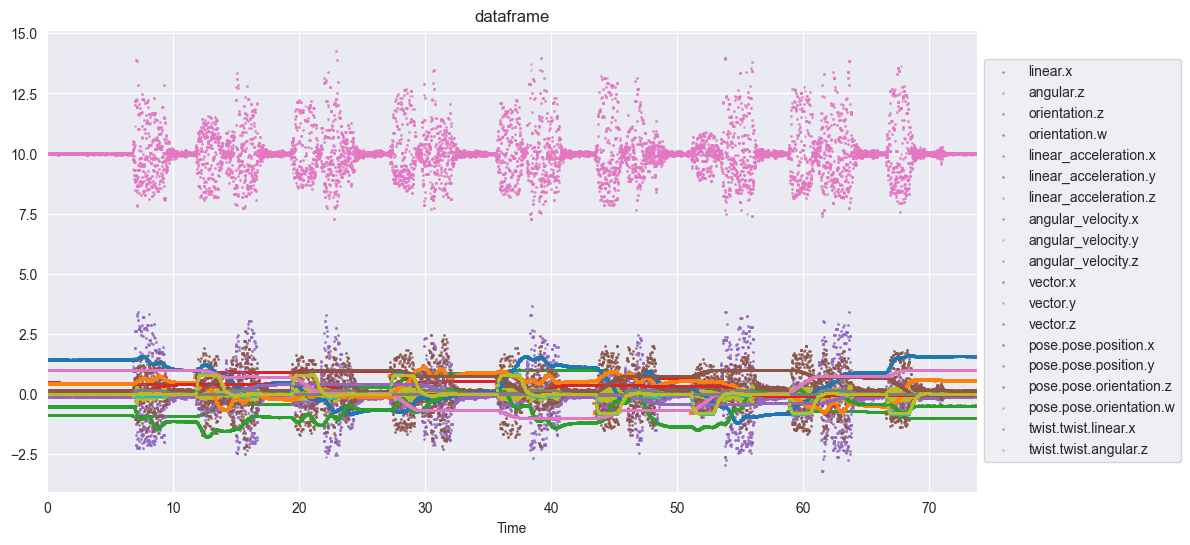

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))

for column in dataframe.columns[1:]:
    ax.scatter(x=dataframe['Time'], y=dataframe[column], s=1, alpha=0.5, label=column)
ax.set_title('dataframe')
ax.set_xlabel('Time')
ax.set_xlim(dataframe['Time'].min(), dataframe['Time'].max())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Add data labels

### Correlation matrix

(19.5, -0.5)

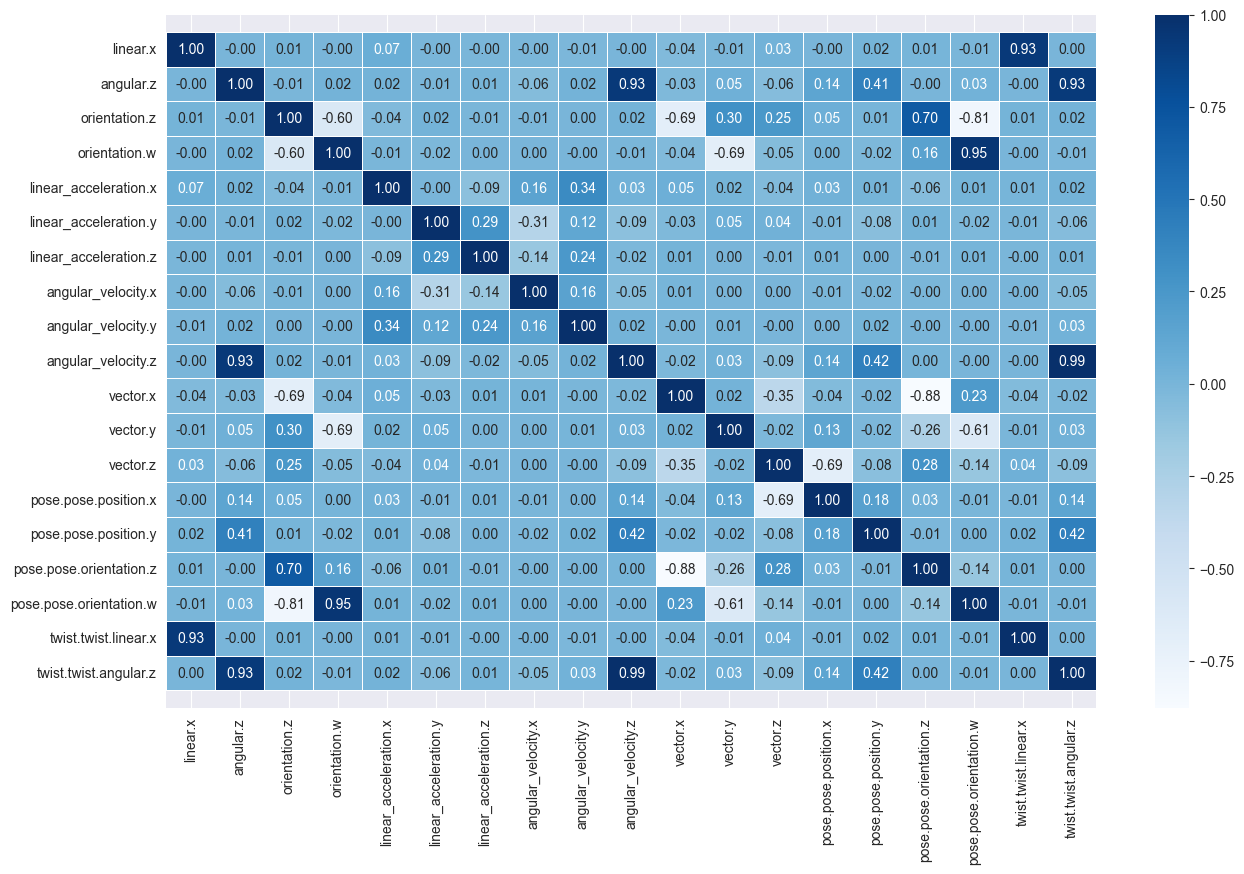

In [25]:
corr_matrix = dataframe.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Correlation visualizations

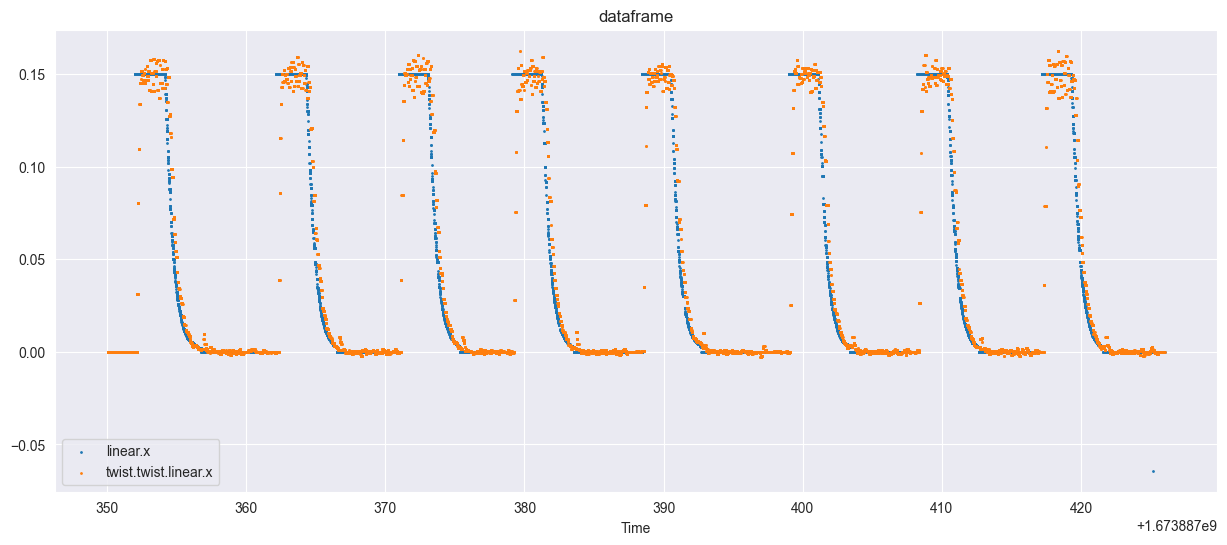

In [26]:
# cmd_vel / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['linear.x', 'twist.twist.linear.x']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

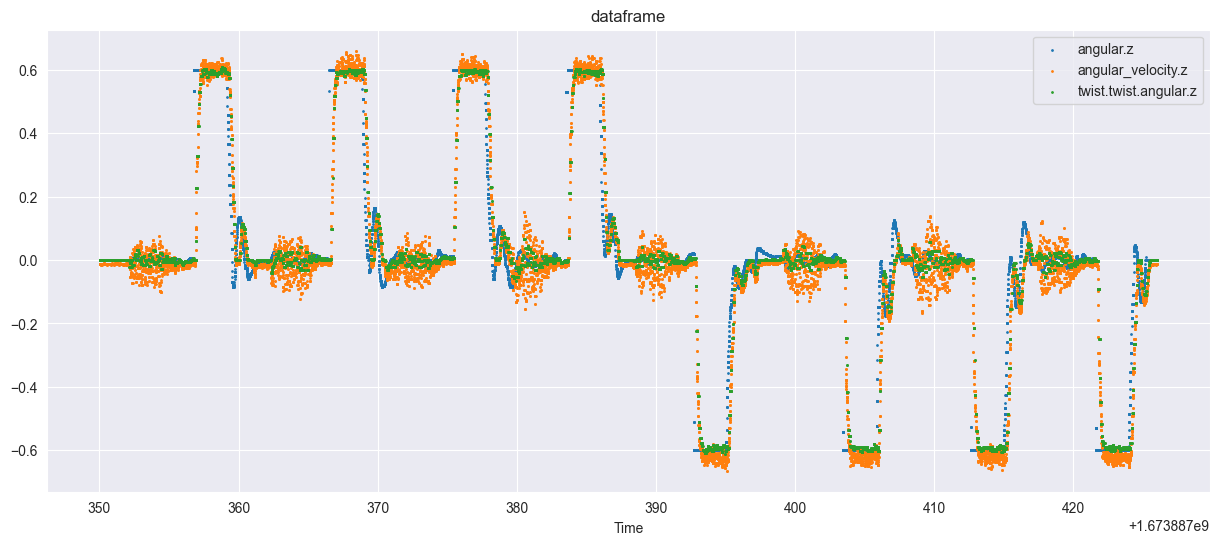

In [27]:
# cmd_vel / imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['angular.z', 'angular_velocity.z', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

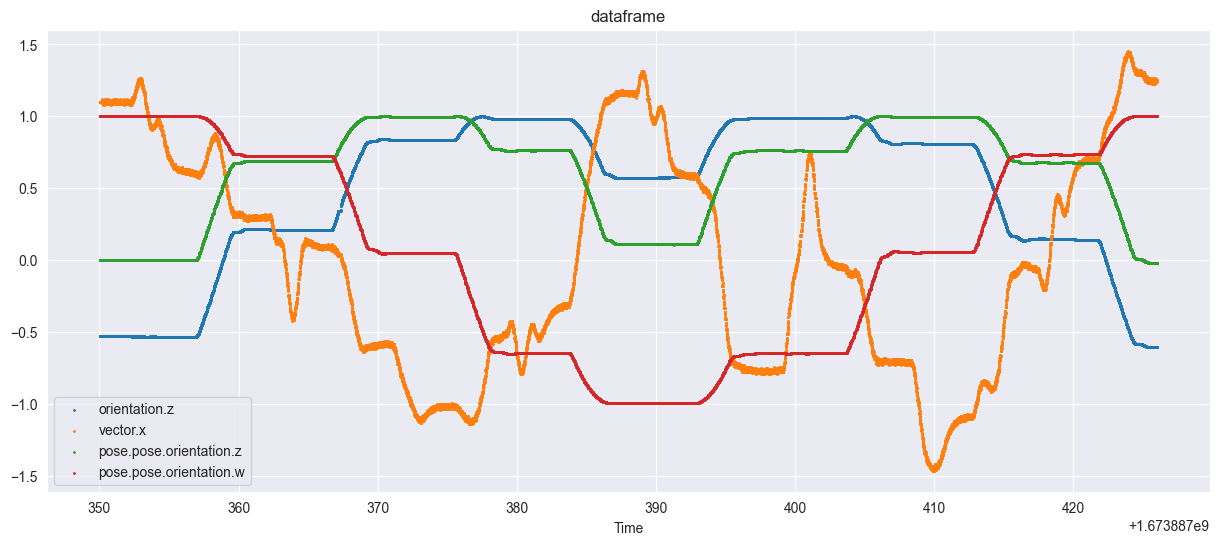

In [28]:
# filter_quaternion / imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['orientation.z', 'vector.x', 'pose.pose.orientation.z', 'pose.pose.orientation.w']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

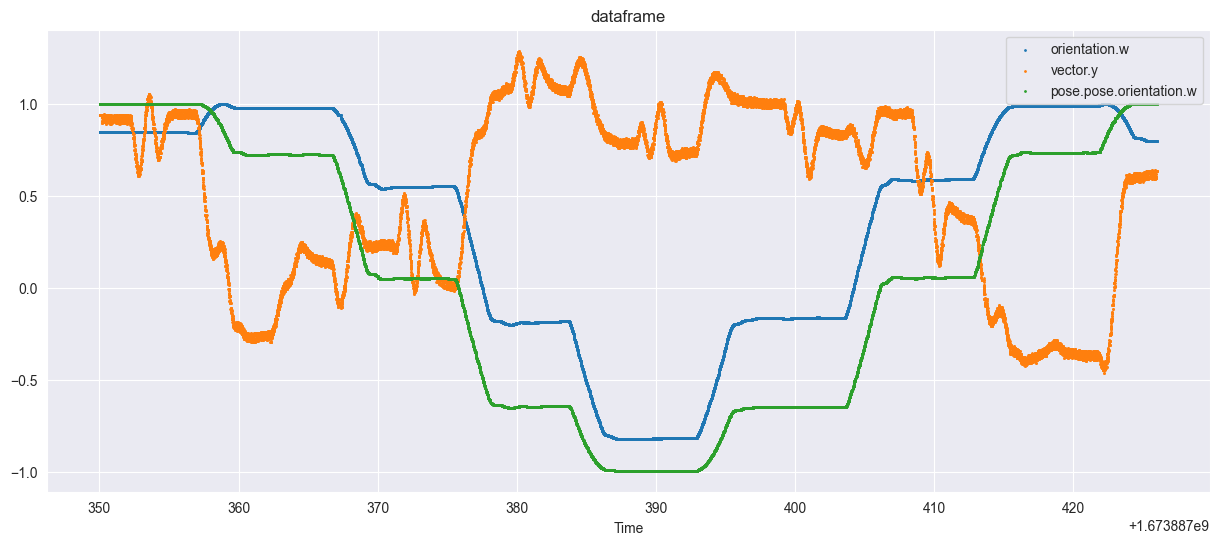

In [29]:
# filter_quaternion / imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['orientation.w', 'vector.y', 'pose.pose.orientation.w']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

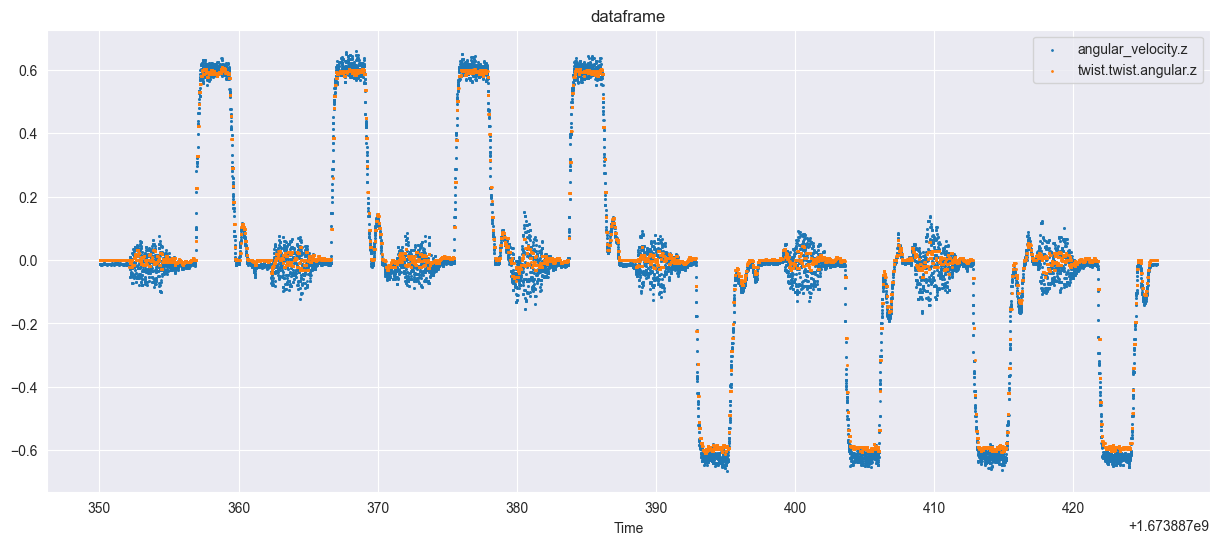

In [30]:
# imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['angular_velocity.z', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

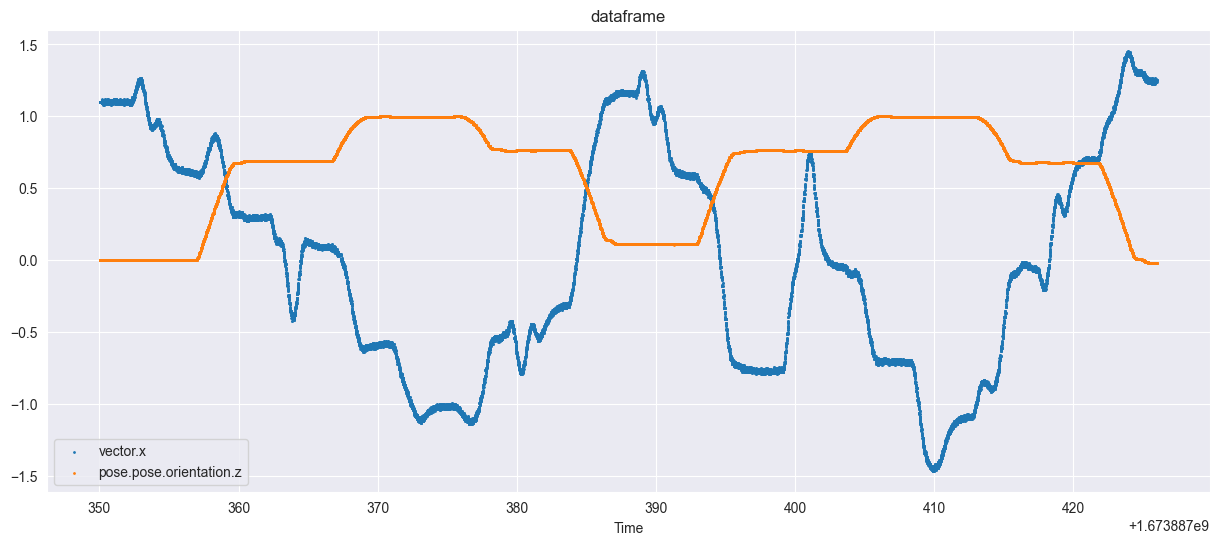

In [31]:
# imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'pose.pose.orientation.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

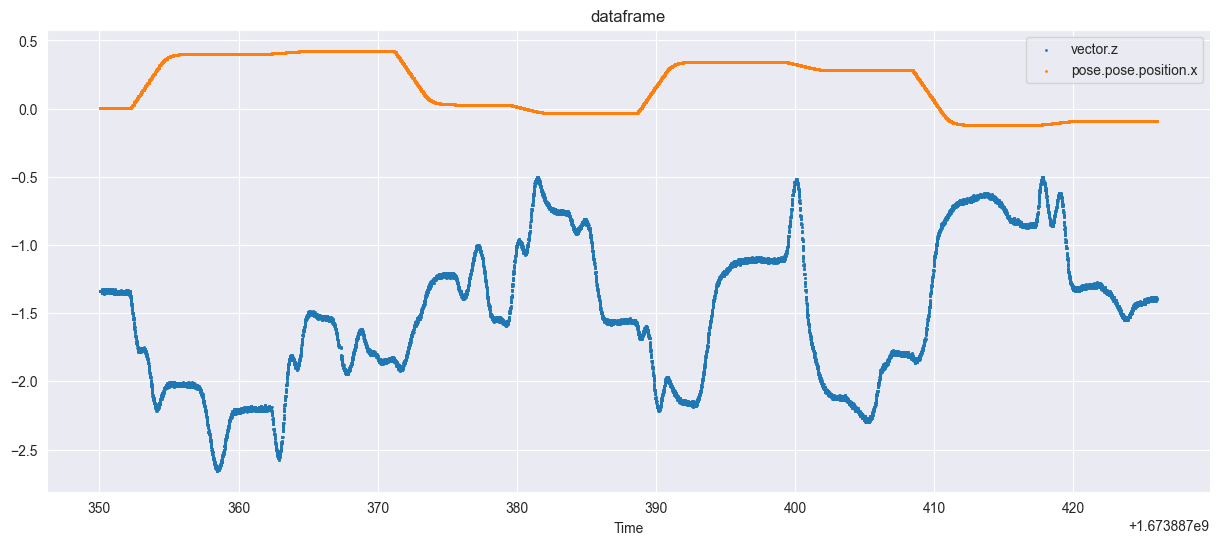

In [32]:
# imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.z', 'pose.pose.position.x']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

### Target datasets

In [33]:
dataframe_no_odom = dataframe.drop(columns=['pose.pose.position.x', 'pose.pose.position.y', 'pose.pose.orientation.z', 'pose.pose.orientation.w', 'twist.twist.linear.x', 'twist.twist.angular.z'])

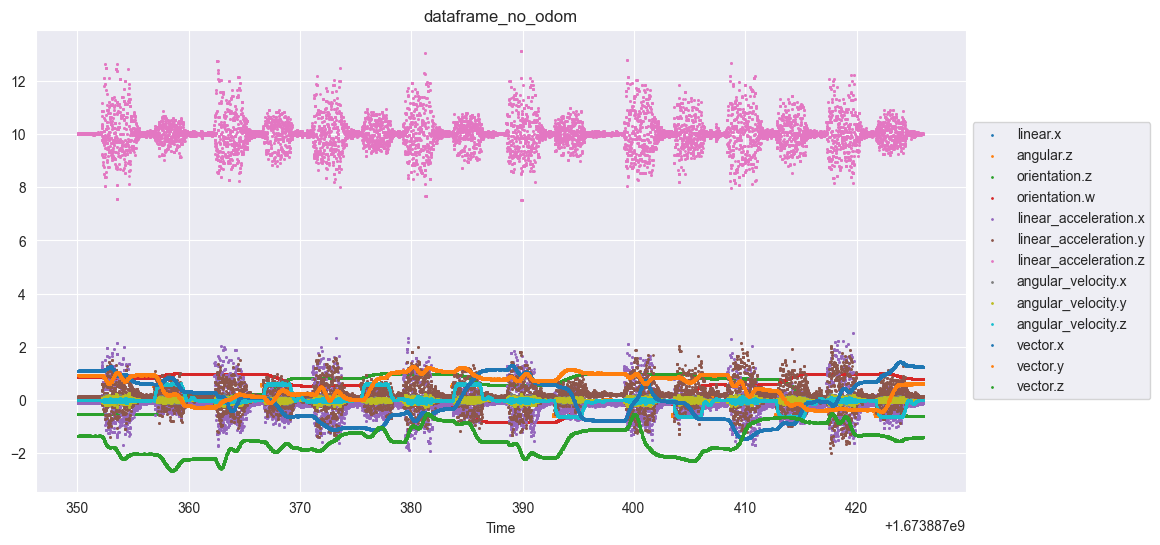

In [34]:
_, ax = plt.subplots(figsize=(15, 6))

for column in dataframe_no_odom.columns:
    ax.scatter(x=dataframe_no_odom.index, y=dataframe_no_odom[column], s=1, label=column)
ax.set_title('dataframe_no_odom')
ax.set_xlabel('Time')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()